## **MNIST DIGIT CLASSIFICATION PROJECT USING NEURAL NETWORKS**

Importing the Dependencies

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras 
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the Data (MNIST)

In [136]:
(X_train, Y_train), (X_test, Y_test)= mnist.load_data()

In [137]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data has  60,000 images

Test data     has  10,000 images

Image Dimension = 28 x 28

Greyscale Image = 1 channel

In [138]:
#display the 13th image
print (X_train[13])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 222
  225   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 147 234 252
  176   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  23 197 253 252 208
   19   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  38 178 252 253 117  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  57 252 252 253  89   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38 222 253 253  79   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 252 179  27   

In [139]:
print(X_train[13].shape)

(28, 28)


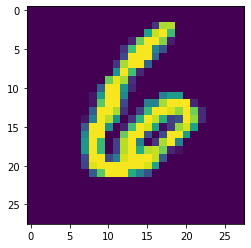

6


In [140]:
#displaying the image
plt.imshow(X_train[13])
plt.show()

#print the corresponding label
print (Y_train[13])

Image Labels

In [141]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [142]:
#unique values in Y_train
print(np.unique(Y_train))
#unique value in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [143]:
#SCALING THE VALUES-(from 0-255 to 0-1)
X_train =X_train/255
X_test = X_test/255

In [144]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**BUILDING THE NEURAL NETWORK**

In [145]:
# setting the layers for the neural network

model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50, activation ='relu'),
                         keras.layers.Dense(50, activation ='relu'),
                         keras.layers.Dense(10, activation ='sigmoid')
])

In [146]:
#compiling the neural network

model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [147]:
#Training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

Training Data Accuracy = 98.83%

**Accuracy on Test Dataset**

In [148]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1051 - accuracy: 0.9699
0.9699000120162964


Test Data Accuracy = 97%

In [149]:
print(X_test.shape)

(10000, 28, 28)


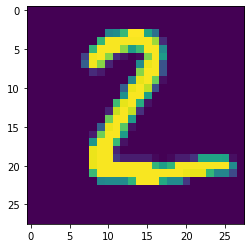

In [150]:
#first data point in X_test
plt.imshow(X_test[1])
plt.show()

In [151]:
print(Y_test[1])

2


In [152]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [153]:
print(Y_pred.shape)

(10000, 10)


In [154]:
print(Y_pred[0])

[1.4374391e-03 7.1467441e-01 6.1776555e-01 6.3362604e-01 1.2592117e-04
 8.9226983e-04 1.1089677e-08 9.9999857e-01 9.5946109e-03 6.5481454e-02]


 model.predict() gives the prediction probability of each class for that data point

In [155]:
#converting the prediction probabilities to class label
label_for_first_test_image= np.argmax(Y_pred[0])
print(label_for_first_test_image)


7


In [156]:
#converting the prediction probabilities to class label for all test dataset
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test--> TrueLabels

Y_pred_labels--> Predicted Labels

**CONFUSION MATRIX**

In [157]:
conf_mat =confusion_matrix(Y_test, Y_pred_label)

In [158]:
print(conf_mat)

tf.Tensor(
[[ 969    1    0    1    1    1    2    2    3    0]
 [   0 1122    0    3    0    3    2    1    4    0]
 [   5    1  983    7    8    2    5    8   13    0]
 [   0    0    2  972    0   25    0    3    4    4]
 [   1    0    2    0  965    3    5    1    1    4]
 [   2    0    0    4    1  879    3    1    2    0]
 [   5    3    0    1    4   10  932    0    3    0]
 [   1    7    6    1    5    0    0  995    7    6]
 [   2    0    1    6    4   14    2    3  939    3]
 [   2    4    0    6   26   11    2    6    9  943]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

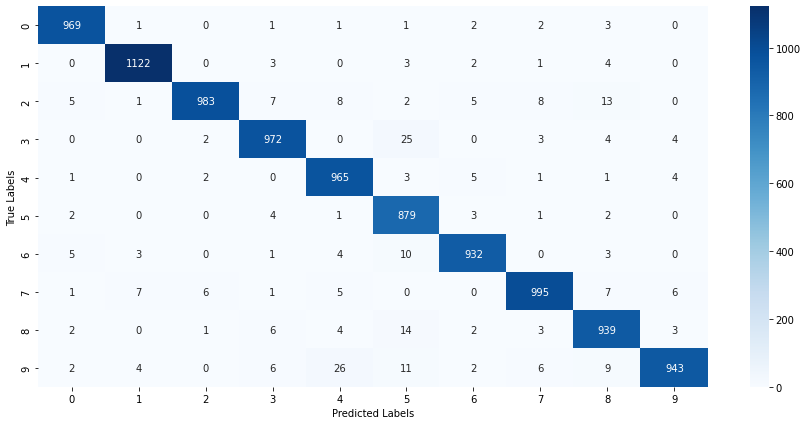

In [159]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a Predictive System**

In [160]:
input_image_path='/content/MNIST_image.png'

In [161]:
#Preprocessing the dimension of the image
input_image =cv2.imread(input_image_path)

In [162]:
type(input_image)

numpy.ndarray

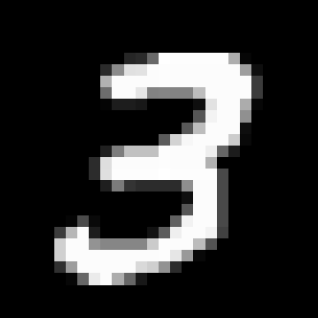

In [163]:
cv2_imshow(input_image)

In [164]:
input_image.shape #it is reading in 318,318,RGB instead of 28,28

(318, 318, 3)

In [165]:
#Converting to Greyscale
greyscale=cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY) 

In [166]:
greyscale.shape

(318, 318)

In [167]:
#Dimension Change
input_image_resize=cv2.resize(greyscale,(28,28))
input_image_resize.shape

(28, 28)

In [168]:
cv2_imshow(input_image_resize)

In [169]:
input_image_resize= input_image_resize/255

In [170]:
#now here we asking the ML model to predict the no. for this 1 image instead of multiple images
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [171]:
input_prediction = model.predict(image_reshaped)
print (input_prediction)

1/1 [==============================] - 0s 16ms/step
[[9.1052485e-11 6.0905391e-01 8.6273110e-05 1.0000000e+00 5.0233084e-10
  8.0084413e-01 1.6618641e-12 3.9422090e-04 9.5386732e-01 6.6479701e-01]]


Final Prediction

In [172]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


# ***FINAL MODEL--PREDICTION SYSTEM***

**DEMO-1**

Path of the image to be predicted: /content/MNIST_image-2''.png


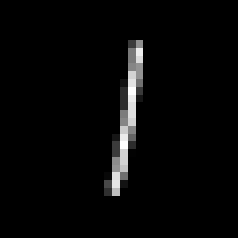

1/1 [==============================] - 0s 18ms/step
The Handwritten Digit is recognised as  1


In [173]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

DEMO-2

Path of the image to be predicted: /content/MNIST_image-3.png


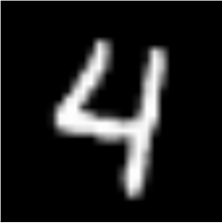

1/1 [==============================] - 0s 17ms/step
The Handwritten Digit is recognised as  4


In [174]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

DEMO-3

Path of the image to be predicted: /content/MNIST_image-4.png


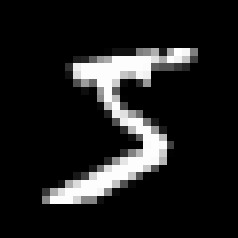

1/1 [==============================] - 0s 17ms/step
The Handwritten Digit is recognised as  5


In [176]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)